<a href="https://colab.research.google.com/github/somrita-banerjee/ml-tutorial/blob/main/helloworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
import graphviz
from IPython.display import Image
import pydotplus

data set is downloaded from https://github.com/mosh-hamedani/python-supplementary-materials and https://www.kaggle.com/datasets/gregorut/videogamesales

# Music prediction from age and gender

## Importing and analyzing

In [ ]:
music_data = pd.read_csv('music.csv')
music_data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [ ]:
music_data.shape

(18, 3)

In [ ]:
music_data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


## Preparing the data

*   cleaning null value,duplicates
*   Splitting the data set for training and testing



In [ ]:
music_X = music_data.drop(columns=['genre'])
music_X.head()

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


In [ ]:
music_Y = music_data['genre']
music_Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

## Learning and predicting


*   Create a model
*   Train the model
*   Make predictions



In [ ]:
music_model = DecisionTreeClassifier()
music_model.fit(music_X,music_Y)
music_predictions = music_model.predict([ [21,1], [22,0]])
music_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

##  Accuracy

*    Evaluate the accuracy

In [ ]:
music_X_train, music_X_test, music_Y_train, music_Y_test = train_test_split(music_X,music_Y,test_size=0.2)
music_model1 = DecisionTreeClassifier()
music_model1.fit(music_X_train,music_Y_train)
music_predictions1 = music_model1.predict(music_X_test)
music_score = accuracy_score(music_Y_test,music_predictions1)
music_score



1.0

In [ ]:
joblib.dump(music_model,'music-recommender.joblib')

['music-recommender.joblib']

In [ ]:
music_model1 = joblib.load('music-recommender.joblib')
music_predictions1 = music_model1.predict([[21,1]])
music_predictions1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

## Visualizing decision tree

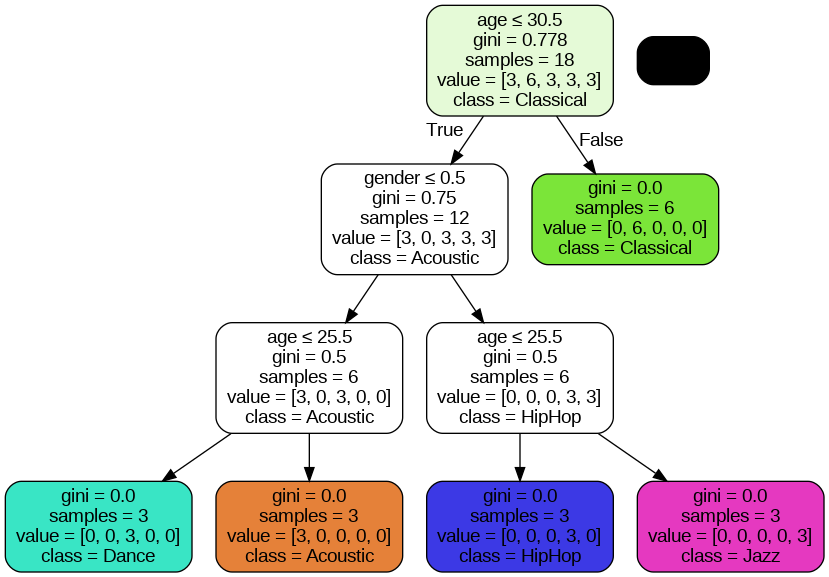

In [40]:
dot_data = tree.export_graphviz(music_model, out_file=None, feature_names=['age','gender'], class_names=sorted(music_Y.unique()), label='all', rounded=True, filled=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Video Game sales


## Import and analyzing

In [41]:
games_data = pd.read_csv('vgsales.csv')
games_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
games_data.shape

(16598, 11)

In [44]:
games_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [45]:
games_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [51]:
games_data.apply(lambda col: len(col.unique()))

Rank            16598
Name            11493
Platform           31
Year               40
Genre              12
Publisher         579
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

## Preparing the Data

NameError: name 'df' is not defined